### eecs545 hw5
Author: Zijin Zhang


In [94]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time

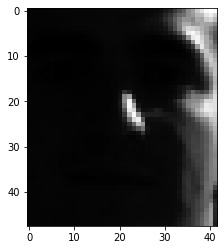

In [95]:
yale = sio.loadmat('yalefaces.mat')
yalefaces = yale['yalefaces']

fig, ax = plt.subplots()
for i in range(yalefaces.shape[2]):
    x = yalefaces[:, :, i]
    ax.imshow(x, extent=[0,10,0,1])
    plt.imshow(x, cmap=plt.get_cmap('gray'))
    # time.sleep(0.1)
    # plt.show()

### Question 4.a

In [96]:
m, n, Z = yalefaces.shape
yalefaces_reshape = yalefaces.reshape((-1, yalefaces.shape[2]))
yalefaces_demean = yalefaces_reshape - np.reshape(np.mean(yalefaces_mtx, axis=1), (m * n, 1))

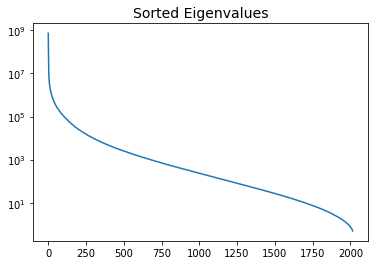

In [97]:
u, s, vh = np.linalg.svd(yalefaces_reshape, full_matrices=True)
λ = s**2 / n
plt.semilogy(λ)
plt.title("Sorted Eigenvalues", fontsize=14)
plt.show()

In [98]:
# Number of principal components
S = (yalefaces_demean).T.dot(yalefaces_demean) / Z
Lambda, U = np.linalg.eig(S)
pct95 = np.where((Lambda.cumsum() / Lambda.sum()) >= 0.95)[0][0] + 1
pct99 = np.where((Lambda.cumsum() / Lambda.sum()) >= 0.99)[0][0] + 1
pct95, pct99

(43, 167)

In [99]:
# Percentage reduction
d = yalefaces.shape[0] * yalefaces.shape[1]
percent_reduct95 = (d-pct95) / d
percent_reduct99 = (d-pct99) / d
(percent_reduct95, percent_reduct99)

(0.9786706349206349, 0.9171626984126984)

So, 43 principal components are needed to represent 95% of total variation, while 167 are needed to represent 99% 
of total variation.  
The percentage reduction of 95% level and 99% are 0.979 and 0.917.

### Question 4.b

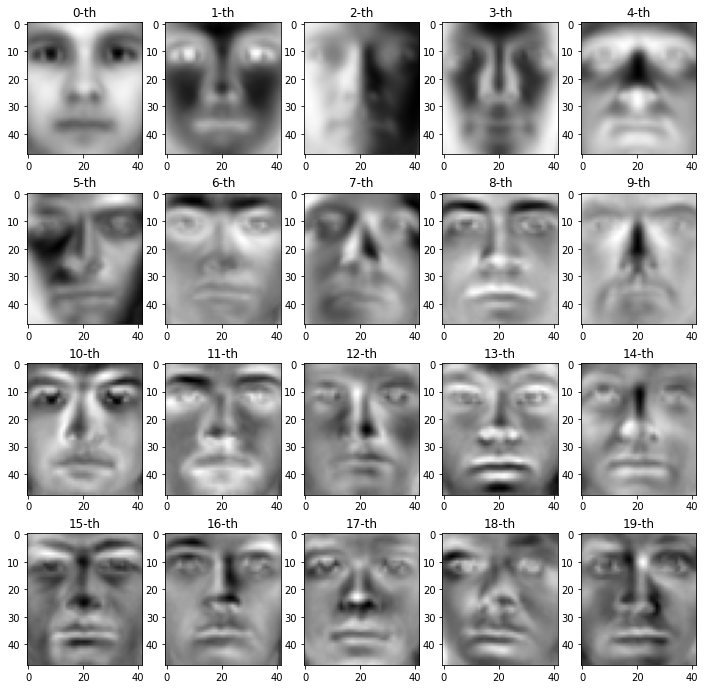

In [107]:
yalefaces_mean = yalefaces_pct.mean(axis=1)

plt.figure(figsize=(12, 12))
plt.subplot(4, 5, 1)
plt.imshow(yalefaces_mean.reshape(yalefaces.shape[: 2]), cmap=plt.get_cmap('gray'))
plt.title("0-th")

for i in range(19):
    plt.subplot(4, 5, i+2)
    plt.imshow(u[:, i].reshape(yalefaces.shape[: 2]), cmap=plt.get_cmap('gray'))
    plt.title("{}-th".format(i+1))

The 1 to 19 eigenfaces are shown abve, where mean added as 0-th. In the faces above, different parts of face are higjlighted, such as  
eyes, nose, cheek, an so on. Different parts of face are captured as principal components. Different ligntings are also shown here.   
Some faces are brighter than others, while some are darker. Even in one face, some parts are darker than other parts of the face.